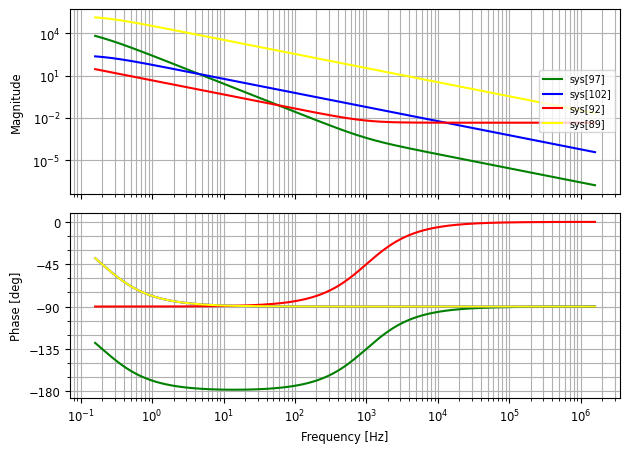

In [9]:
import control as co
import numpy as np

V_IN, V_OUT = 5, 170
N_PS = 1 / 10
L = 10e-6
R_LOAD, C_OUT = 170e+3, 4.7e-6
V_REF = 1.26
f_SW = 350e+3
T_SW = 1 / f_SW
D_a = 2 * L * V_OUT ** 2 / (V_IN ** 2 * T_SW * R_LOAD)
D_b = (V_IN + N_PS * V_OUT) / (N_PS * V_OUT) * D_a
R_FB1 = 330e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.006
I_SLOPE = 30e-6
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, I_SLOPE * f_SW

g_m, G_comp = 2e-3, 0.142
ea_additional_gain = 100000
f_z3 = 1000
C_comp = 1 / ea_additional_gain
R_comp = 1 / (2 * np.pi * f_z3 * C_comp)
A_ea = g_m * G_comp * ea_additional_gain

G_vci2 = N_PS * 1 / 2 * (V_IN * D_a / L * (D_b / D_a - 1) / S_n + D_b - D_a) / R_s * S_n / (S_e + S_n)

Z_o = co.tf([1], [C_OUT, 1 / R_LOAD])

G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1, 0])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_overall_loop = G_vci2 * Z_o * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_vci2 * Z_o * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')
co.bode(Z_o, np.logspace(0, 7, 1000), Hz=True, color='yellow')

In [10]:
print(S_n, S_f, S_e)

499999.99999999994 1699999.9999999998 10.5
